### Sep

In [1]:
import pandas as pd
import json
from collections import defaultdict as ddict
from datetime import date
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/bad_ip_data/ucsc/Vaccine_Disinfo/data/FULLDF/sep_cluster.csv')

In [3]:
df.head(5)

,Unnamed: 0,domain,scanned url,total,positives,duration[VT],rlength,resolution,server,URL after redirects,Final URL,suspicious_tld,length,fake_tld,brand,pop_keywords,similar,is_idn,minus,num_subdomains
0,0,forbes.com.br,https://forbes.com.br/negocios/2020/06/astraze...,83,0,0,143266.0,104.26.8.58,cloudflare,None,https://forbes.com.br/negocios/2020/06/astraze...,N,100,0,0,0,0,N,8,1
1,1,google.com,https://www.google.com/amp/s/www.elespanol.com...,83,0,0,77255.0,173.194.193.106,nginx,https://www.elespanol.com/invertia/observatori...,https://www.elespanol.com/invertia/observatori...,N,142,0,0,0,0,N,6,2
2,2,xhne.ws,http://xhne.ws/yXuub,83,0,0,23767.0,203.192.12.6,Tengine,http://www.xinhuanet.com/english/2020-09/02/c_...,http://www.xinhuanet.com/english/2020-09/02/c_...,N,59,0,0,0,0,N,1,2
3,3,nbcnews.com,https://www.nbcnews.com/health/health-news/lar...,83,0,0,276310.0,23.59.20.89,nginx,None,https://www.nbcnews.com/health/health-news/lar...,N,98,0,0,0,1,N,10,1
4,4,mol.im,https://mol.im/a/8684869%20http:/dailym.ai/and...,83,0,98,174.0,23.48.106.183,NaN,None,https://mol.im/a/8684869%20http:/dailym.ai/and...,N,50,0,0,0,0,N,0,1


In [4]:
df.columns

Index(['Unnamed: 0', 'domain', 'scanned url', 'total', 'positives',
       'duration[VT]', 'rlength', 'resolution', 'server',
       'URL after redirects', 'Final URL', 'suspicious_tld', 'length',
       'fake_tld', 'brand', 'pop_keywords', 'similar', 'is_idn', 'minus',
       'num_subdomains'],
      dtype='object')

In [5]:
cdf = df[['Final URL', 'total', 'positives','duration[VT]','suspicious_tld', 'length',
       'fake_tld', 'brand', 'pop_keywords', 'similar', 'is_idn', 'minus','num_subdomains']]

In [6]:
cdf

,Final URL,total,positives,duration[VT],suspicious_tld,length,fake_tld,brand,pop_keywords,similar,is_idn,minus,num_subdomains
0,https://forbes.com.br/negocios/2020/06/astraze...,83,0,0,N,100,0,0,0,0,N,8,1
1,https://www.elespanol.com/invertia/observatori...,83,0,0,N,142,0,0,0,0,N,6,2
2,http://www.xinhuanet.com/english/2020-09/02/c_...,83,0,0,N,59,0,0,0,0,N,1,2
3,https://www.nbcnews.com/health/health-news/lar...,83,0,0,N,98,0,0,0,1,N,10,1
4,https://mol.im/a/8684869%20http:/dailym.ai/and...,83,0,98,N,50,0,0,0,0,N,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831,https://indianexpress.com/article/india/oxford...,83,0,0,N,184,0,0,0,0,N,10,2
14832,https://www.launica945.com/category/meche-cast...,83,0,0,N,61,0,0,0,0,N,4,1
14833,https://mobile.twitter.com/SMadlokovu/status/1...,83,0,0,N,64,0,1,0,1,N,0,1
14834,https://www.cnbc.com/2020/09/10/who-calls-dela...,83,0,0,N,304,0,0,0,1,N,12,2


In [7]:
cdf.dtypes

Final URL         object
total              int64
positives          int64
duration[VT]       int64
suspicious_tld    object
length             int64
fake_tld           int64
brand              int64
pop_keywords       int64
similar            int64
is_idn            object
minus              int64
num_subdomains     int64
dtype: object

In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cdf['suspicious_tld'] = label_encoder.fit_transform(cdf['suspicious_tld'])
cdf['is_idn'] = label_encoder.fit_transform(cdf['is_idn'])

In [9]:
cdf

,Final URL,total,positives,duration[VT],suspicious_tld,length,fake_tld,brand,pop_keywords,similar,is_idn,minus,num_subdomains
0,https://forbes.com.br/negocios/2020/06/astraze...,83,0,0,0,100,0,0,0,0,0,8,1
1,https://www.elespanol.com/invertia/observatori...,83,0,0,0,142,0,0,0,0,0,6,2
2,http://www.xinhuanet.com/english/2020-09/02/c_...,83,0,0,0,59,0,0,0,0,0,1,2
3,https://www.nbcnews.com/health/health-news/lar...,83,0,0,0,98,0,0,0,1,0,10,1
4,https://mol.im/a/8684869%20http:/dailym.ai/and...,83,0,98,0,50,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831,https://indianexpress.com/article/india/oxford...,83,0,0,0,184,0,0,0,0,0,10,2
14832,https://www.launica945.com/category/meche-cast...,83,0,0,0,61,0,0,0,0,0,4,1
14833,https://mobile.twitter.com/SMadlokovu/status/1...,83,0,0,0,64,0,1,0,1,0,0,1
14834,https://www.cnbc.com/2020/09/10/who-calls-dela...,83,0,0,0,304,0,0,0,1,0,12,2


In [10]:
#Normalize columns of pandas data frame
cdf = cdf.iloc[:,1:].apply(lambda x: x/x.max(), axis=0)

In [11]:
cdf

,total,positives,duration[VT],suspicious_tld,length,fake_tld,brand,pop_keywords,similar,is_idn,minus,num_subdomains
0,1.0,0.0,0.000000,0.0,0.126263,0.0,0.0,0.0,0.0,0.0,0.125000,0.0625
1,1.0,0.0,0.000000,0.0,0.179293,0.0,0.0,0.0,0.0,0.0,0.093750,0.1250
2,1.0,0.0,0.000000,0.0,0.074495,0.0,0.0,0.0,0.0,0.0,0.015625,0.1250
3,1.0,0.0,0.000000,0.0,0.123737,0.0,0.0,0.0,0.5,0.0,0.156250,0.0625
4,1.0,0.0,0.025926,0.0,0.063131,0.0,0.0,0.0,0.0,0.0,0.000000,0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...
14831,1.0,0.0,0.000000,0.0,0.232323,0.0,0.0,0.0,0.0,0.0,0.156250,0.1250
14832,1.0,0.0,0.000000,0.0,0.077020,0.0,0.0,0.0,0.0,0.0,0.062500,0.0625
14833,1.0,0.0,0.000000,0.0,0.080808,0.0,1.0,0.0,0.5,0.0,0.000000,0.0625
14834,1.0,0.0,0.000000,0.0,0.383838,0.0,0.0,0.0,0.5,0.0,0.187500,0.1250


In [12]:
cdf.isnull().sum()

total             0
positives         0
duration[VT]      0
suspicious_tld    0
length            0
fake_tld          0
brand             0
pop_keywords      0
similar           0
is_idn            0
minus             0
num_subdomains    0
dtype: int64

### T_SNE

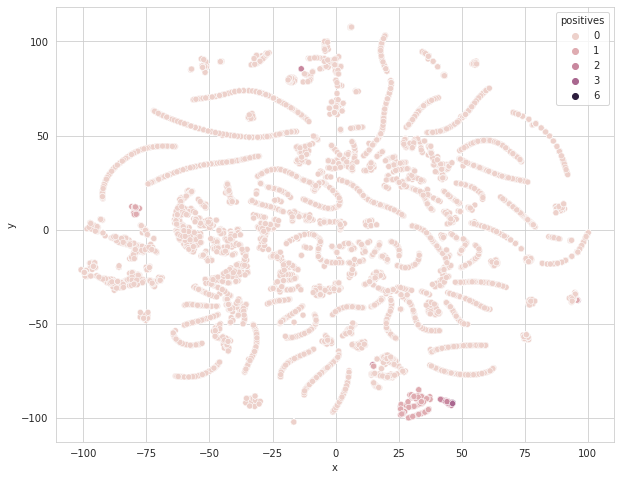

In [13]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(cdf)

X_embedded = pd.DataFrame(list(map(lambda x:{'x':x[0][0],'y':x[0][1],'positives':x[1]},zip(X_embedded,list(df['positives'])))))

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=X_embedded,x='x',y='y',hue='positives')
# plt.plot(X_embedded)
plt.show()

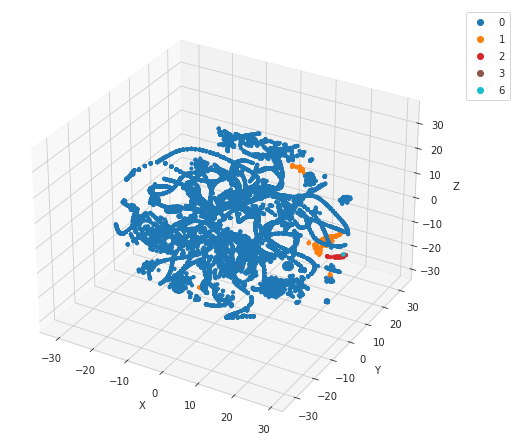

In [14]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=3).fit_transform(cdf)
X_embedded = pd.DataFrame(list(map(lambda x:{'x':x[0][0],'y':x[0][1],'z':x[0][2],'positives':x[1]},zip(X_embedded,list(df['positives'])))))

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("tab10").as_hex())

# plot
sc = ax.scatter(X_embedded.x, X_embedded.y, X_embedded.z, s=40, c=X_embedded.positives, marker='.', cmap=cmap, alpha=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

### DB SCAN

In [15]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=2).fit(cdf)

In [19]:
set(clustering.labels_)

{0}